# Black-hole binary formation channels with gaussian mixtures.

## Theory Introduction
Many problems in astrophysics give rise to data with multiple modes. This is typically because different processes physical processes contribute to the observed dataset. 

For instance, one of the most outstanding question in gravitational-wave astrophysics is the formation channel of binary black holes. Leading scenarions include the evolution of isolated binaries in the galactic field and the dynamica assembly of sources in dense environments like globular clusters.


Right now, state-of-the-art analyses seems to say that many channels are all at play. This is a plot by [Zevin et al (2020)](https://arxiv.org/abs/2011.10057)


![Screen%20Shot%202022-01-15%20at%2013.34.38.png](attachment:Screen%20Shot%202022-01-15%20at%2013.34.38.png)

where they consider 5 possibilities for the formation of black hole binaries: common envelop (CE), chemically omogenous stars (CHE), globular clusters (GC), nuclear star clusters (NSC) and stable mass transfer (SMT). 

If you want to know more about LIGO-driven astrophysics and black hole binaries formation channels, these are some recent reviews: [Mandel and Farmer (2021)](https://arxiv.org/abs/1806.05820), [Mapelli (2021)](https://arxiv.org/abs/2106.00699), [Gerosa and Fishbach (2021)](https://arxiv.org/abs/2105.03439).



## Exercise instructions
Some events form in different astrophysical environments than others. **You want to figure out how many of formation channels are at play.**


The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability.

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see? Anyway.  
(LIGO measures the masses of many black holes. You can find the dataset at `solutions/formationchannels.npy`.)

In [32]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

(array([0.00063165, 0.        , 0.00063165, 0.00063165, 0.00063165,
        0.        , 0.00126329, 0.00189494, 0.00126329, 0.00063165,
        0.00252658, 0.00063165, 0.00189494, 0.00442152, 0.00378987,
        0.0069481 , 0.00252658, 0.0069481 , 0.00568481, 0.00947468,
        0.00821139, 0.00568481, 0.0069481 , 0.01200126, 0.01200126,
        0.0069481 , 0.01010633, 0.01073797, 0.01200126, 0.00757974,
        0.00884304, 0.00884304, 0.00568481, 0.00947468, 0.00821139,
        0.00252658, 0.00757974, 0.00631645, 0.00189494, 0.00315823,
        0.00505316, 0.00884304, 0.01452784, 0.02526582, 0.04547847,
        0.07390251, 0.09158858, 0.08148226, 0.06569112, 0.03221392,
        0.02400253, 0.01642278, 0.03031898, 0.0277924 , 0.02968733,
        0.02968733, 0.03221392, 0.04611011, 0.03726708, 0.05053163,
        0.04358353, 0.04737341, 0.04926834, 0.05368986, 0.05179492,
        0.0555848 , 0.0543215 , 0.05305821, 0.05053163, 0.04484682,
        0.05495315, 0.03663543, 0.03600379, 0.04

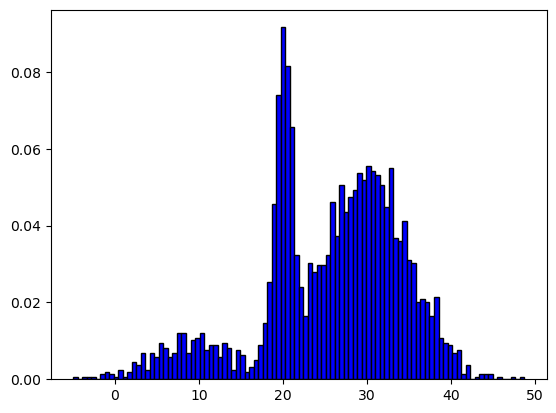

In [ ]:
data = np.load("../solutions/formationchannels.npy")

plt.hist(data, bins=100, density=True, color='b', edgecolor='black')

_I see 3 different models (3 gaussians)_

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

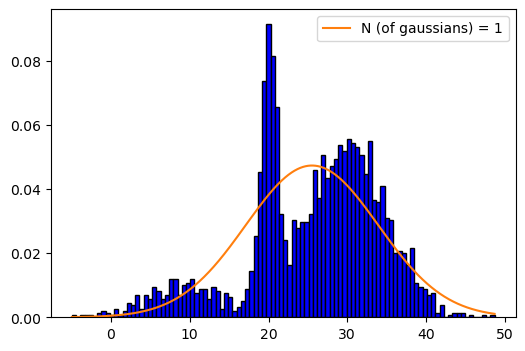

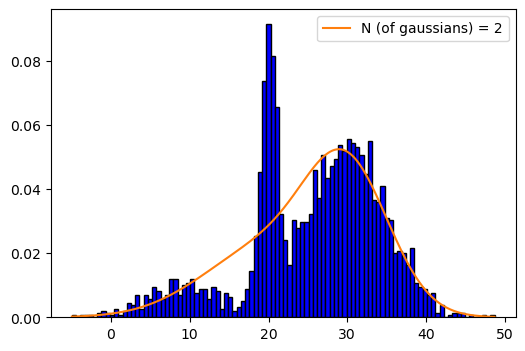

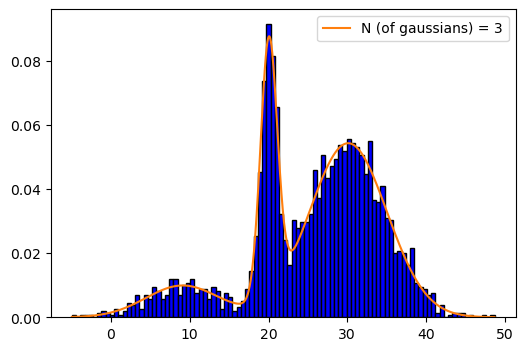

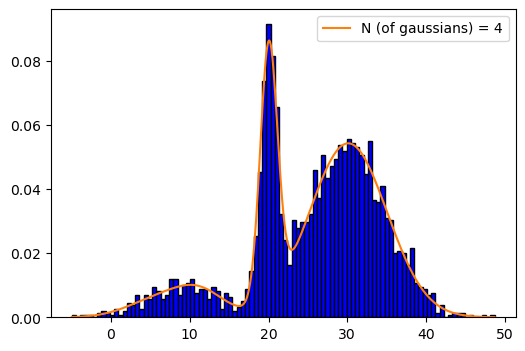

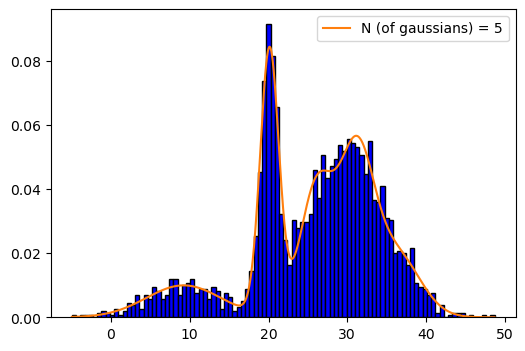

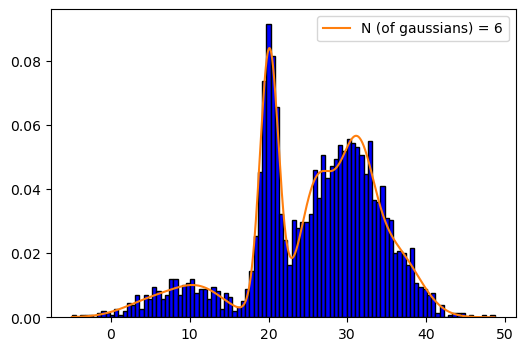

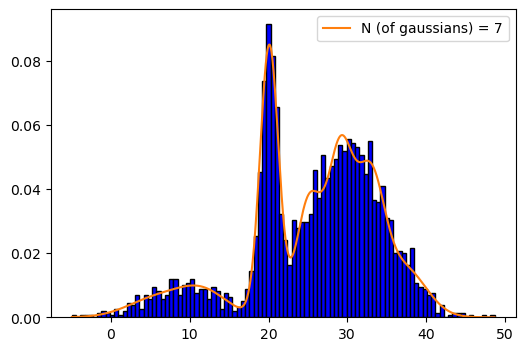

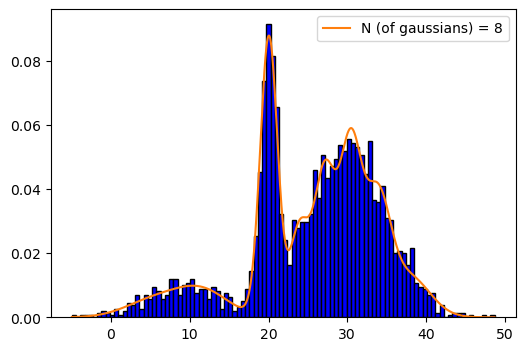

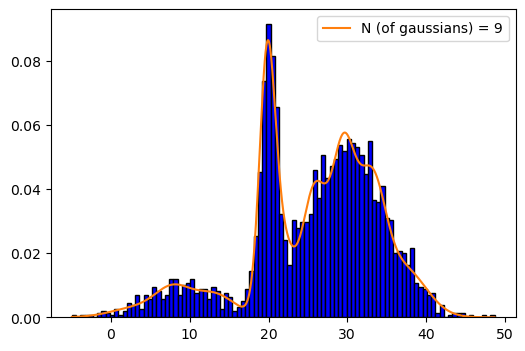

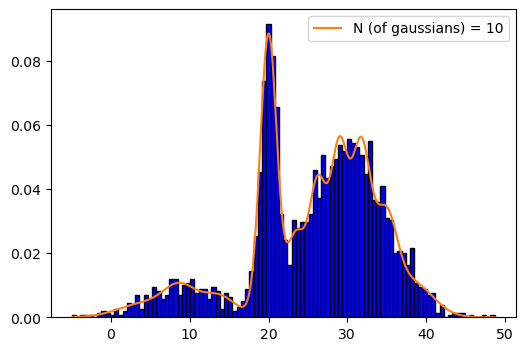

In [65]:
xgrid = np.linspace(data.min(), data.max(), 2000)

# Initialize an empty NumPy array to store AIC values
v_AIC = []  

# fit with Gaussian Mixture for N=1...10 gaussians
for N in range(1, 11):
    plt.figure(figsize=(6, 4))  # Create a new figure for each N
    plt.hist(data, bins=100, density=True, color='b', edgecolor='black')
    gm = GaussianMixture(n_components=N)
    gm.fit(data)

    #Plot a gaussian
    gm_pdf = np.exp(gm.score_samples(xgrid.reshape(-1, 1)))  # .score_samples = Compute the log-likelihood of each sample, I do the .exp to return pdf
   
    plt.plot(xgrid, gm_pdf, color='C1', label=f'N (of gaussians) = {N}')
    plt.legend()

    #Fill AIC array
    v_AIC.append(gm.aic(data))


4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

Text(0.5, 1.0, 'AIC vs Number of Gaussian Components')

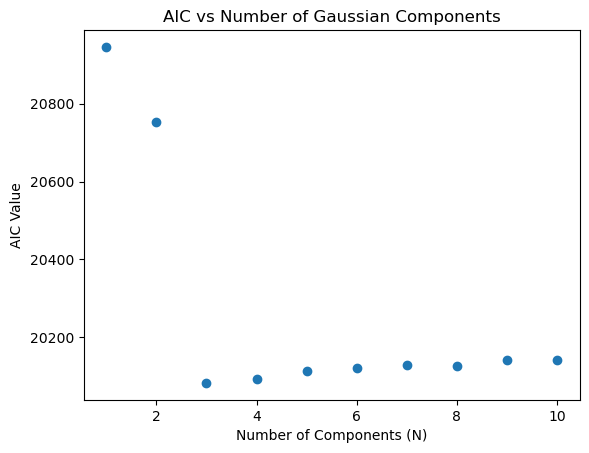

In [66]:
N = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

plt.scatter(N, v_AIC)

plt.xlabel("Number of Components (N)")
plt.ylabel("AIC Value")
plt.title("AIC vs Number of Gaussian Components")

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

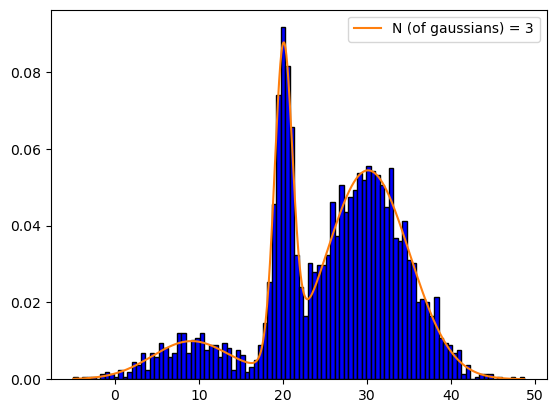

In [67]:
best_AIC_index = v_AIC.index(min(v_AIC))
best_N = N[best_AIC_index]

gm = GaussianMixture(n_components=best_N).fit(data.reshape(-1, 1)) # .fit needs array-like of shape (n_samples, n_features), so I use reshape (data is 1D array)

#Plot a gaussian
gm_pdf = np.exp(gm.score_samples(xgrid.reshape(-1, 1)))  # .score_samples = Compute the log-likelihood of each sample, I do the .exp to return pdf
   
plt.plot(xgrid, gm_pdf, color='C1', label=f'N (of gaussians) = {best_N}')

plt.hist(data, bins=100, density=True, color='b', edgecolor='black')
plt.legend()


6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.

Output of .predict_proba: 
 N=1 		 N=2 		 N=3 
 [[2.88560784e-01 3.14520485e-01 3.96918731e-01]
 [3.84447019e-05 5.19113463e-38 9.99961555e-01]
 [5.50001832e-05 8.42594732e-36 9.99945000e-01]
 ...
 [9.99999879e-01 1.10366561e-39 1.20573332e-07]
 [9.99993671e-01 1.20013416e-20 6.32928172e-06]
 [9.99602706e-01 4.68784663e-07 3.96825169e-04]]


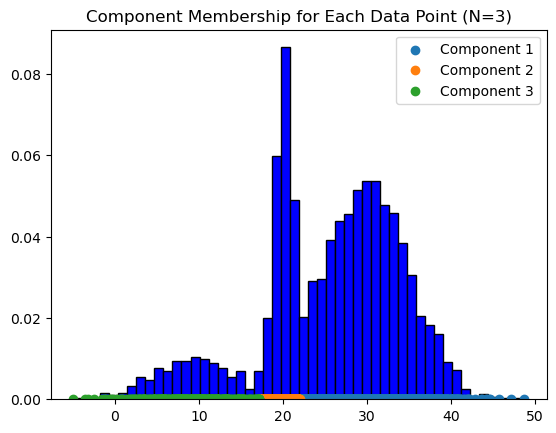

In [ ]:
# !!! RIVEDIII !!!
# Predict the component probabilities for each data point
component_probs = gm.predict_proba(data)  # output is a 2D array component_probs, each row corresponds to a data point, each column corresponds to one of the Gaussian components.

print(f"Output of .predict_proba: \n N=1 \t\t N=2 \t\t N=3 \n", component_probs)

# For each data point, the component with the highest probability is the most likely component
most_likely_component = np.argmax(component_probs, axis=1)

# Plot the histogram of the data and color the data points according to the component they belong to
plt.hist(data, bins=50, density=True, color='blue', edgecolor='black')
for i in range(optimal_N):
    # Highlight the data points that belong to the i-th component
    plt.scatter(data[most_likely_component == i], np.zeros_like(data[most_likely_component == i]), label=f"Component {i+1}")
    
plt.title(f"Component Membership for Each Data Point (N={optimal_N})")
plt.legend()


## CHAT GPT SOLUTION

Data shape: (2950, 1)
First few data points: [[17.12172682]
 [ 5.94121793]
 [ 6.35914124]
 [ 3.63515689]
 [13.32703815]
 [-2.50769348]
 [17.72405882]
 [ 5.1939655 ]
 [10.59519548]
 [ 7.75314812]]


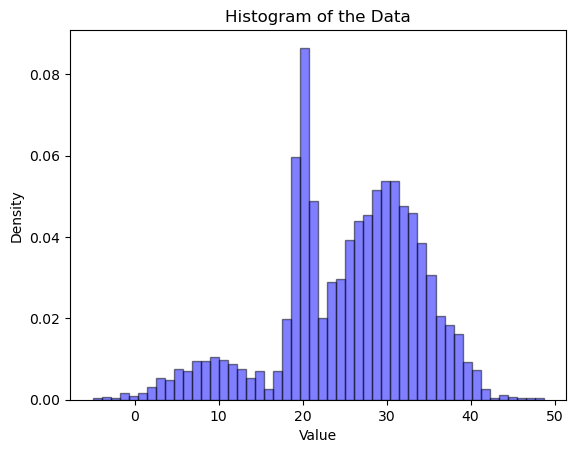

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = np.load("../solutions/formationchannels.npy")

# Check the shape and first few data points
print("Data shape:", data.shape)
print("First few data points:", data[:10])

# Plot the histogram to visually inspect the distribution
plt.hist(data, bins=50, density=True, color='blue', edgecolor='black', alpha=0.5)
plt.title("Histogram of the Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


In [56]:
from sklearn.mixture import GaussianMixture

# Initialize the Gaussian Mixture Model (GMM) with N=1
gm = GaussianMixture(n_components=1)

# Fit the model to the data
gm.fit(data)

# Print out some details of the fitted model
print("Means of the Gaussian components:", gm.means_)
print("Covariances of the Gaussian components:", gm.covariances_)
print("Weights of the components:", gm.weights_)


Means of the Gaussian components: [[25.52008475]]
Covariances of the Gaussian components: [[[70.88768431]]]
Weights of the components: [1.]


In [57]:
# Array to store AIC values
aic_values = []

# Fit the model for N=1 to N=10 components
for N in range(1, 11):
    gm = GaussianMixture(n_components=N)
    gm.fit(data)
    
    # Store the AIC value for the current model
    aic_values.append(gm.aic(data))

# Print AIC values
print("AIC values for N=1 to N=10:", aic_values)


AIC values for N=1 to N=10: [20945.9726085902, 20753.496007115133, 20082.938230997795, 20101.600433331405, 20113.92152789594, 20121.65589538031, 20131.89913107235, 20134.704415920067, 20143.47803948212, 20138.16480737344]


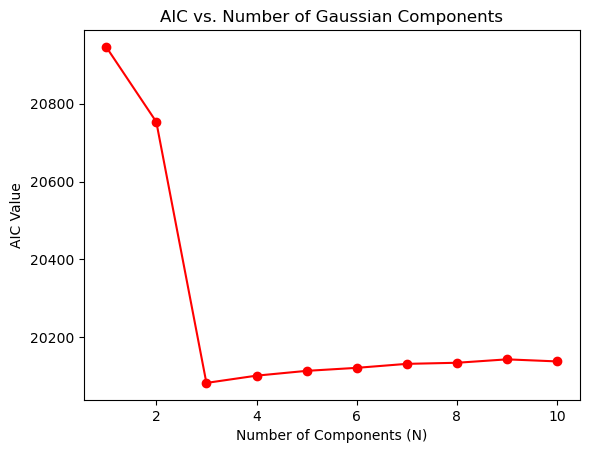

In [58]:
# Plot AIC vs N
plt.plot(range(1, 11), aic_values, marker='o', linestyle='-', color='r')
plt.xlabel("Number of Components (N)")
plt.ylabel("AIC Value")
plt.title("AIC vs. Number of Gaussian Components")
plt.show()


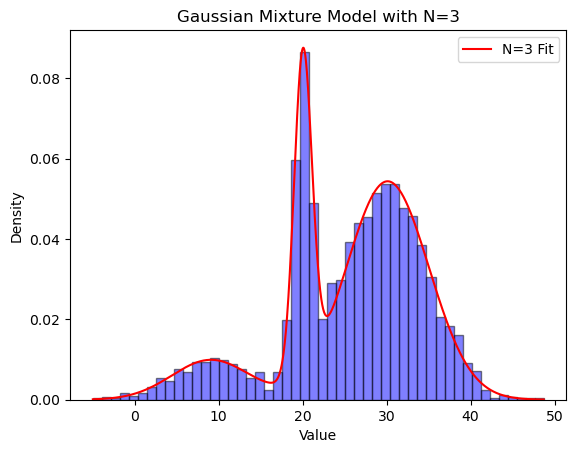

In [60]:
# Let's assume the best N is 3 (based on the AIC plot, replace with the optimal N)
optimal_N = 3

# Fit the model with optimal N
gm = GaussianMixture(n_components=optimal_N)
gm.fit(data)

# Generate the x values for the plot
xgrid = np.linspace(data.min(), data.max(), 2000).reshape(-1, 1)

# Compute the fitted Gaussian PDF
gm_pdf = np.exp(gm.score_samples(xgrid))

# Plot the histogram and the fitted Gaussian Mixture Model
plt.hist(data, bins=50, density=True, color='blue', edgecolor='black', alpha=0.5)
plt.plot(xgrid, gm_pdf, color='red', label=f'N={optimal_N} Fit')
plt.title(f"Gaussian Mixture Model with N={optimal_N}")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


Output of .predict_proba: 
 N=1 		 N=2 		 N=3 
 [[2.88560784e-01 3.14520485e-01 3.96918731e-01]
 [3.84447019e-05 5.19113463e-38 9.99961555e-01]
 [5.50001832e-05 8.42594732e-36 9.99945000e-01]
 ...
 [9.99999879e-01 1.10366561e-39 1.20573332e-07]
 [9.99993671e-01 1.20013416e-20 6.32928172e-06]
 [9.99602706e-01 4.68784663e-07 3.96825169e-04]]


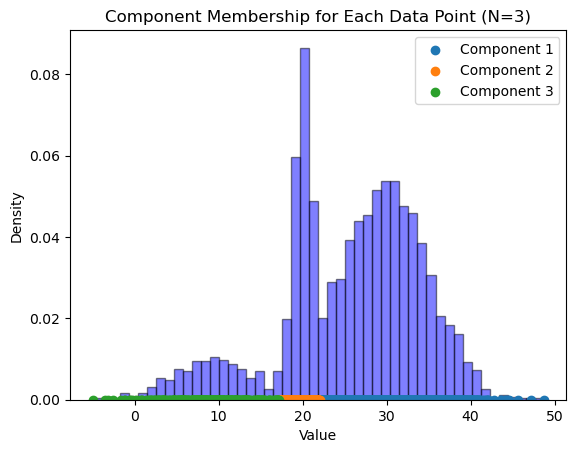

In [ ]:
# Predict the component probabilities for each data point
component_probs = gm.predict_proba(data)  # output is a 2D array component_probs, each row corresponds to a data point, each column corresponds to one of the Gaussian components.

# For each data point, the component with the highest probability is the most likely component
most_likely_component = np.argmax(component_probs, axis=1)

# Plot the histogram of the data and color the data points according to the component they belong to
plt.hist(data, bins=50, density=True, color='blue', edgecolor='black', alpha=0.5)
for i in range(optimal_N):
    # Highlight the data points that belong to the i-th component
    plt.scatter(data[most_likely_component == i], np.zeros_like(data[most_likely_component == i]), label=f"Component {i+1}")
    
plt.title(f"Component Membership for Each Data Point (N={optimal_N})")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()
